In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set(style='white') 

In [3]:
data = pd.concat([pd.read_json(f, lines=True) for f in glob.glob("../data/houses*.jl")])
data = data.drop(columns=["adaugat_la", "Compartimentare", "text"])
data["nr_anunt"] = data["nr_anunt"].map(lambda x: x[0] if type(x) == list else x)

data.set_index('nr_anunt', inplace=True)

data['CohortGroup'] = data.groupby(level=0)['date'].min()
data.reset_index(inplace=True)
data.head()

nr_anunt An constructie           Camere Etaj Locuinta mobilata / utilata  \
0   95712824            NaN         3 camere  NaN                         NaN   
1  138237577    1977 – 1990              NaN    8                         NaN   
2  131080683            NaN  4 sau mai multe  NaN                     Complet   
3  133540587            NaN  4 sau mai multe  NaN                         NaN   
4  153445923            NaN  4 sau mai multe  NaN                     Complet   

    Oferit de Suprafata utila       date    price  \
0     Agentie          110 m² 2018-03-15   83000€   
1  Proprietar           70 m² 2018-03-15   65200€   
2     Agentie          160 m² 2018-03-15  100000€   
3     Agentie          400 m² 2018-03-15  290000€   
4     Agentie          356 m² 2018-03-15  175000€   

                                               title  \
0  Casa de vanzare central sau schimb cu apartame...   
1    Apartament 3 camere vanzare, Nufarul zona Lotus   
2                      Casa de vanzare Paleu, Oradea   
3                            Casă / Vilă cu 9 camere   
4         De vanzare casa, Oradea semicentrala,V0455   

                                         type  \
0                      Case de vanzare Oradea   
1  Apartamente - Garsoniere de vanzare Oradea   
2                      Case de vanzare Oradea   
3                      Case de vanzare Oradea   
4                      Case de vanzare Oradea   

                                                 url CohortGroup  
0  https://www.olx.ro/oferta/casa-de-vanzare-cent...  2018-02-14  
1  https://www.olx.ro/oferta/apartament-3-camere-...  2018-02-13  
2  https://www.olx.ro/oferta/casa-de-vanzare-pale...  2018-02-07  
3  https://www.olx.ro/oferta/casa-vila-cu-9-camer...  2018-02-07  
4  https://www.olx.ro/oferta/de-vanzare-casa-orad...  2018-02-15

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1000)
pd.set_option('expand_frame_repr', False)  # more options can be specified also
data[data["type"]  == "Case de vanzare Oradea"].sample(10)


nr_anunt An constructie           Camere Etaj Locuinta mobilata / utilata   Oferit de Suprafata utila       date      price                                                       title                    type                                                                                                url CohortGroup
135564  120267823            NaN         2 camere  NaN      Nemobilata / neutilata     Agentie           65 m² 2018-02-20     33500€                            Casa renovabila - Str. Ghe. Doja  Case de vanzare Oradea                                https://www.olx.ro/oferta/casa-renovabila-str-ghe-doja-ID88D9B.html  2018-02-07
137971  140234985            NaN         3 camere  NaN      Nemobilata / neutilata  Proprietar          150 m² 2018-02-20     23000€                            Casa plus teren 2.5ha langa casa  Case de vanzare Oradea                            https://www.olx.ro/oferta/casa-plus-teren-2-5ha-langa-casa-ID9upvB.html  2018-02-07
13098   153473035            NaN         3 camere  NaN      Nemobilata / neutilata  Proprietar          100 m² 2018-03-16     70500€                               Case la intrare in Santandrei  Case de vanzare Oradea                               https://www.olx.ro/oferta/case-la-intrare-in-santandrei-IDanXlx.html  2018-02-15
84125   133989755            NaN  4 sau mai multe  NaN      Nemobilata / neutilata  Proprietar          355 m² 2018-05-16    155000€                             Vând casa str.Adevarului nr. 29  Case de vanzare Oradea                              https://www.olx.ro/oferta/vand-casa-str-adevarului-nr-29-ID94cR5.html  2018-02-12
138244  162869165            NaN         2 camere  NaN                     Complet  Proprietar             NaN 2018-05-09      8900€                                    Casă în Sinicolaul Român  Case de vanzare Oradea                                    https://www.olx.ro/oferta/casa-in-sinicolaul-roman-IDb1nI1.html  2018-05-08
89217   161694873            NaN  4 sau mai multe  NaN                         NaN     Agentie          676 m² 2018-05-25  577000lei                                      ID:9467 Casa in Oradea  Case de vanzare Oradea                                       https://www.olx.ro/oferta/id9467-casa-in-oradea-IDaVsdP.html  2018-04-29
25437   161543051            NaN         3 camere  NaN                         NaN     Agentie          130 m² 2018-05-02     68000€           Real Brokers - Casa 3 cam + living, zona centrala  Case de vanzare Oradea                https://www.olx.ro/oferta/real-brokers-casa-3-cam-living-zona-centrala-IDaWOJ5.html  2018-04-26
153911  144780175            NaN  4 sau mai multe  NaN                         NaN     Agentie           90 m² 2018-02-11     59000€                          Casa de vanzare in Livada de Bihor  Case de vanzare Oradea                          https://www.olx.ro/oferta/casa-de-vanzare-in-livada-de-bihor-ID9NtV7.html  2018-02-07
84306   158201215            NaN  4 sau mai multe  NaN                         NaN     Agentie          160 m² 2018-05-16    165500€  Casa Noua 4 Dormitoare P-cul Ghioceilor IOSIA teren 570 mp  Case de vanzare Oradea  https://www.olx.ro/oferta/casa-noua-4-dormitoare-p-cul-ghioceilor-iosia-teren-570-mp-IDaHNmw.html  2018-03-27
187974  139369439            NaN  4 sau mai multe  NaN                     Complet     Agentie          230 m² 2018-02-10    370000€                      SAPIENT | Vila zona Nufaru - Apateului  Case de vanzare Oradea                          https://www.olx.ro/oferta/sapient-vila-zona-nufaru-apateului-ID9qMmb.html  2018-02-07

In [80]:
data[(data["text"].str.contains("ultracentral")) & (data["type"]  == "Case de vanzare Oradea")]

An constructie           Camere Compartimentare Locuinta mobilata / utilata   Oferit de Suprafata utila       date      price                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text                                                                   title                    type                                                                                                          url
1716            NaN         3 camere             NaN                         NaN     Agentie          129 m² 2018-03-15     72500€  Apartament foarte bine pozitionat la nivelul orasului pe strada Mihai Eminescu,la casa curte comuna extrem de curata,vecini OK.este pozitionat la etajul 1 al cladirii,este un apartament decomandat,mare,spatios,camere inalte,imediat ocupabil si locuibil,necesita o zugraveala complecta,faianta si gresie este OK.dar detine o vechime de 17 ani,incalzirea de la sistemul centralizat al Oradiei,este foarte aproape de str.Republicii ( circa 120 metri liniari ),este compus dintr-un Hol acces mare,3 Camere mari,1 Bucatarie mare,2 Baii mari,1 Debara generoasa iar la subsol detine o boxa proprie intabulata in CF,loc de parcare Auto suficient cu abonament,toate actele in buna regula,pret foarte usor negociabil,mai bine spus nu se doreste a se vinde sub pretul de 70 000 euro,perfect pentru locuinta personala cat si pentru investitii,zona ultracentrala perfecta pentru Chirii,cabinete,etc.La plata in vederea achizitionarii acestui apartament se accepta Cash dar si orice tip de Credit Bancar,mai mu...                 AP.3 Camere la Casa str.M.Eminescu et.1 Sp.Utila 129 mp  Case de vanzare Oradea               https://www.olx.ro/oferta/ap-3-camere-la-casa-str-m-eminescu-et-1-sp-utila-129-mp-IDa94ln.html
1736            NaN         2 camere             NaN                     Complet  Proprietar           65 m² 2018-03-15     66500€                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Casa semidetasata- de vanzare in zona ultracentrala strada Iuliu Maniu la aprox 100 m distanta de Biserica cu Luna, Piata Unirii, 73 mp construiti, teren aferent de 102 mp (curte comuna), beci uscat, de caramida de 17 mp, pe un singur nivel.                                          Casa semidetasata Ultracentral  Case de vanzare Oradea                                        https://www.olx.ro/oferta/casa-semidetasata-ultracentral-ID1OcKX

In [89]:
!polyglot download embeddings2.ro ner2.ro

[polyglot_data] Downloading package embeddings2.ro to
[polyglot_data]     /home/rolisz/polyglot_data...
[polyglot_data] Downloading package ner2.ro to
[polyglot_data]     /home/rolisz/polyglot_data...


In [88]:
!pip install morfessor

  Running setup.py install for morfessor ... done
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from polyglot.text import Text

In [5]:
blob = """Vand casa in Diosig (30 km de Oradea) pe str Horea. Casa este compusa din 2 corpuri : Unul nou (2008) compus din 2 camere, iar al doilea corp din 3 camere, camara, hol mare. In curte exista un beci exterior din beton. Gradina mare, curte betonata, plus anexe (cotet, camara de lemne, etc). Pentru detalii"""
text = Text(blob)
text.entities
# We can also specify language of that text by using
# text = Text(blob, hint_language_code='en')

[I-LOC(['Diosig']), I-LOC(['Oradea'])]

In [15]:
import json

values = []
annots = {3: "Street", 5: "City", 4: "Neighborhood"}
for line in open("../data/annot.json").readlines():
    struct = json.loads(line)
    v = {"text": struct['text']}
    for annot in struct['annotations']:
        start = annot['start_offset']
        end = annot['end_offset']
        v[annots[annot["label"]]] = struct['text'][start:end]
    values.append(v)
    #print(json.loads(line)['annotations'])
pd.DataFrame(values)

City                    Neighborhood                    Street                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text
0                  NaN                             NaN               str. Coziei                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Casa este situata intr-o zona foarte buna a orasului str. Coziei, in apropierea str. Horia,  si se constituie din demisol+parter; constructie din caramida din anul 1929 cu suprafata 110 mp pe nivel si o curte de cca 30mp.
1                Paleu                             NaN                       NaN  Casa de vanzare Paleu, OradeaVa propunem spre vanzare casa in Paleu, construita in anul 2008, pe un teren in suprafata de 488 metri patrati. Imobilul se afla dupa serpentinele adiacente cart. Oncea. Casa este construita in regim P+E, fiind finisata cu materiale de cea mai buna calitate, pe un teren cu front stradal 20 de metri si intrare auto. Suprafata construita a casei este de 200 mp, iar suprafata utila este de 160 mp. La subsolul acestei case se gaseste o camera tehnica in suprafata de 6 metri patrati. Parterul imobilului este compus din: hol, living + bucatarie cu loc de luat masa si iesire pe terasa, 1 camera,  camara de alimente, baie cu dus. La etaj se gasesc: 3 dormitoare, din care dormitorul matrimonial are dressing si iesire pe terasa. Baia este generoasa frumos amenajata cu tot mobilierul de baie si jacuzzi. Finisajele sunt bine executate, gresie in baie, hol si bucatarie, podele laminate in camere si living, usi din lemn, geamuri termopan cu rolete. Pe exterior, izola...
2                  NaN                             NaN                       NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

data = pd.concat([pd.read_json(f, lines=True) for f in glob.glob("../data/houses*.jl")])
data = data.drop(columns=["adaugat_la", "Etaj", "nr_anunt"])


In [29]:
data[data["type"]=="Case de vanzare Oradea"]["text"].unique().shape

(2603,)

In [22]:
data[data["type"]=="Case de vanzare Oradea"][["text"]][:500].to_json("data.jsonl", lines=True, orient="records", )

In [2]:
grouped = data.groupby(["CohortGroup", "date"])
cohorts = grouped.agg({'nr_anunt': pd.Series.nunique})

print(cohorts.head())

exp = pd.DataFrame(cohorts.to_records())

exp["CohortPeriod"] = exp["date"] - exp["CohortGroup"]
exp.set_index(["CohortGroup", "CohortPeriod"], inplace=True)
print(exp.head())
cohort_group_size = exp["nr_anunt"].groupby(level=0).first()
retention = exp["nr_anunt"].unstack(0).divide(cohort_group_size, axis=1)
print(retention.head())

                        nr_anunt
CohortGroup date                
2018-02-07  2018-02-07      2551
            2018-02-08      2461
            2018-02-09      2390
            2018-02-10      2345
            2018-02-11      2300
                               date  nr_anunt
CohortGroup CohortPeriod                     
2018-02-07  0 days       2018-02-07      2551
            1 days       2018-02-08      2461
            2 days       2018-02-09      2390
            3 days       2018-02-10      2345
            4 days       2018-02-11      2300
CohortGroup   2018-02-07  2018-02-08  2018-02-09  2018-02-10  2018-02-11  \
CohortPeriod                                                               
0 days          1.000000    1.000000    1.000000     1.00000    1.000000   
1 days          0.964720    0.921569    0.941176     1.00000    0.955882   
2 days          0.936887    0.901961    0.862745     0.93750    0.852941   
3 days          0.919247    0.901961    0.862745     0.90625    0.8

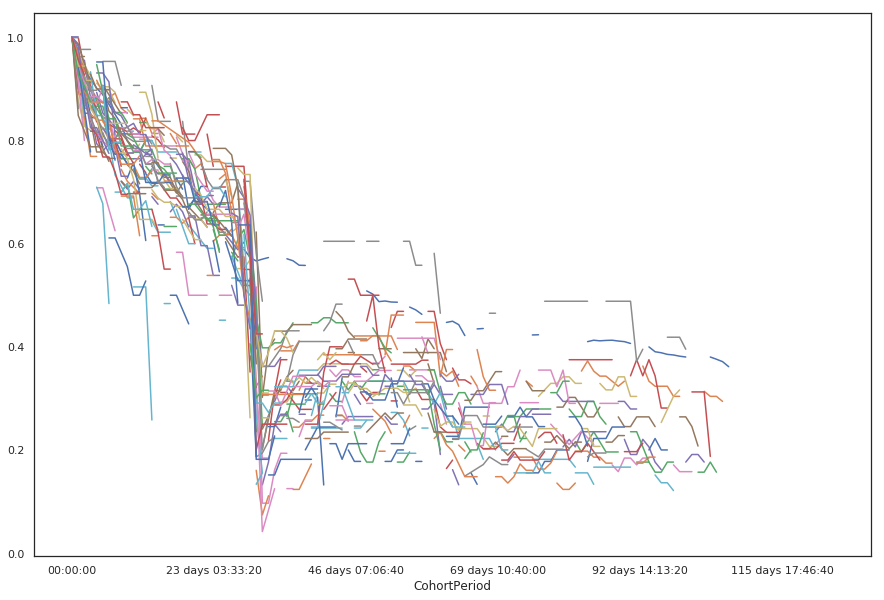

In [3]:
retention.plot(figsize=(15,10), legend=False)

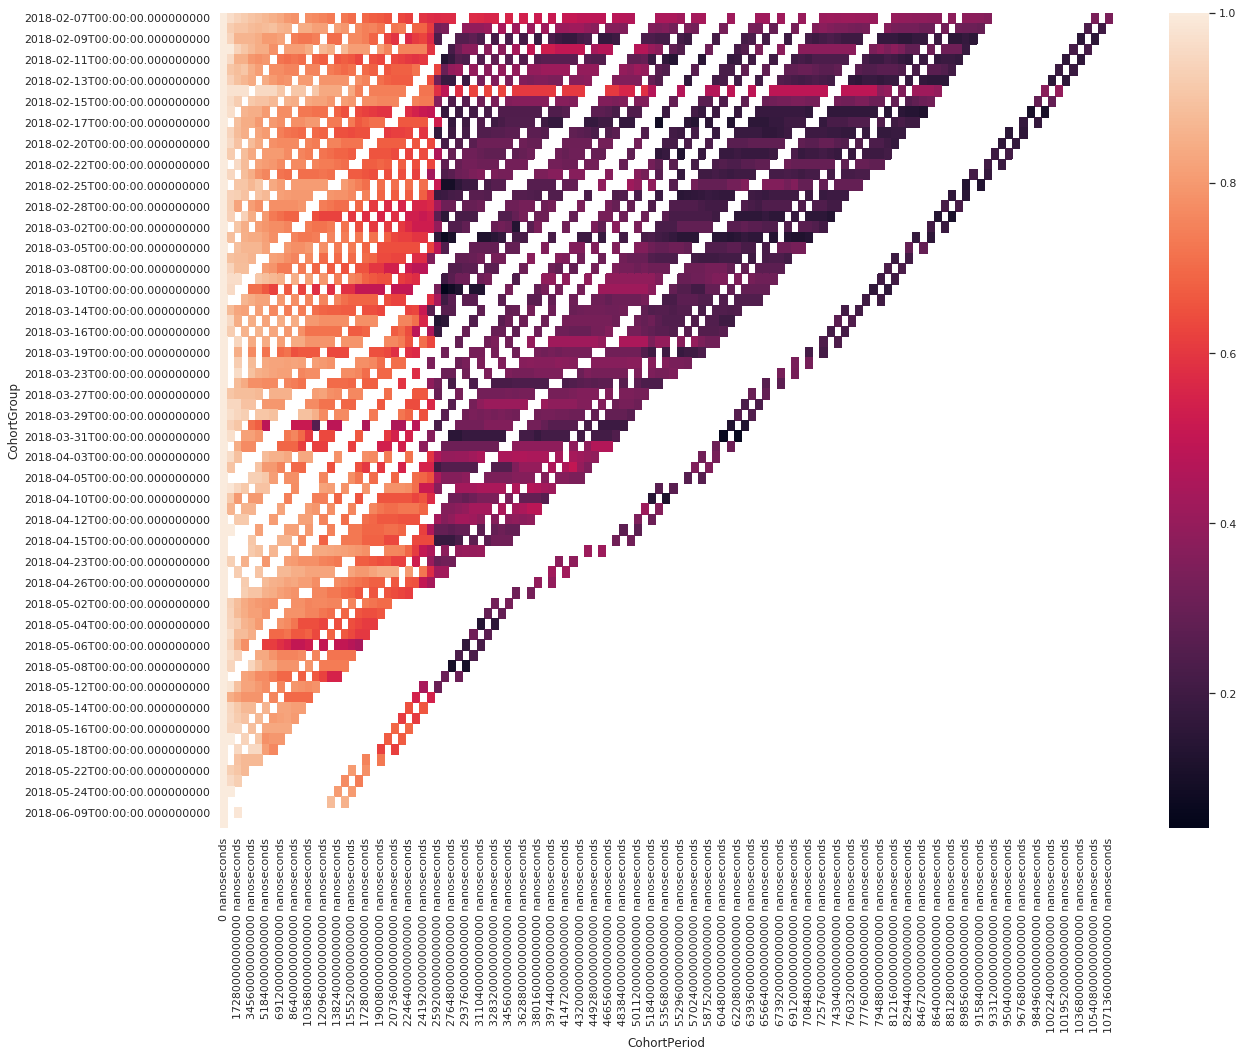

In [4]:
plt.figure(figsize=(20, 15))
sns.heatmap(retention.T, )